# Подкидышев Алексей. Задача 4_2

In [1]:
# удобная функия для построения графиков
def plot_( x,y_arr, title_str = None, ylim= None):    
    plt.figure(figsize=(15, 6))
    plt.grid()
    
    plt.title(title_str) 
    
    for i in range(len(y_arr)):
        if x is None:
            x = np.arange(1, len(y_arr[i]) + 1)
        plt.plot(x, y_arr[i])
        
    plt.xlabel('x')
    plt.ylabel('y')
    
    
    plt.legend(fontsize=16)
    plt.show()

In [2]:
import tqdm
from tqdm import tnrange

## Матрицы дифференцирования для чебышёвских узлов

$$x_k = \dfrac{1}{2}(a + b) + \dfrac{1}{2}(b-a)\cos{\dfrac{2k-1}{2n}\pi}, \text{где } k \in \{\overline{1, n} \} $$

In [3]:
# считает узлы чебышева
import numpy as np

def calc_cheb_nodes(a, b, num_knot):
    k = (np.arange(num_knot) + 1 )[-1::-1]
    return (a+b)/2 + (b - a)/2 * np.cos((2*k - 1) /(2 * num_knot) * np.pi)

Строим матрицу так, чтобы при умножении ее на вектор из значений функции в узлах получился вектор из производных.

In [4]:
def calc_matrix(a,b,num_knot):
    # получамемф узлы
    knots = calc_cheb_nodes(a, b, num_knot)
    M = np.zeros((num_knot, num_knot))
    
    for k in range(1, num_knot - 1):
        M[k][k + 1] = 1 / (knots[k + 1] - knots[k - 1])
        M[k][k - 1] = -M[k][k + 1]
    
    M[0][1] = 1 / (knots[1] - knots[0])
    M[0][0] = -M[0][1]
    M[-1][-1] = 1/(knots[-1] - knots[-2])
    M[-1][-2] = -M[-1][-1]
    
    return M

Проверим на $f(x) = \sin{x}$. Значение  $num knot \in \overline{10, 10^4 } $

In [5]:
import random
import matplotlib.pyplot as plt

err = list()
a = random.randint(1, 10)
b = a + 10
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)
test_knots_arr = np.arange(10,10**3)

for num_knot in tnrange(10,10**3):
    cur_knots = calc_cheb_nodes(a, b, num_knot)
    #M = calc_matrix(a, b, num_knot, f)
    derivatives_value = calc_matrix(a, b, num_knot) @ np.array([f(d) for d in cur_knots])
    cur_err = np.array([df(d) for d in cur_knots]) - derivatives_value
    
    err.append(np.linalg.norm(cur_err, ord=np.inf))




In [6]:
err = np.log(np.array(err))

No handles with labels found to put in legend.


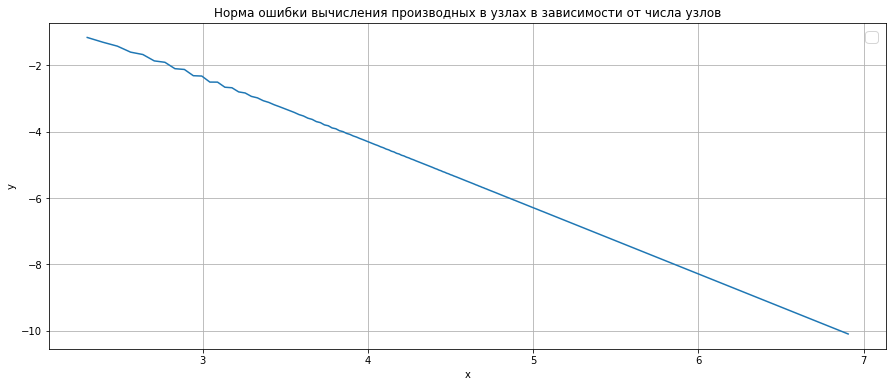

In [7]:
plot_(np.log(test_knots_arr), [err], title_str = 'Норма ошибки вычисления производных в узлах в зависимости от числа узлов')